In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
contents = np.random.rand(8,3)*10
contents

array([[1.21867311, 6.9487192 , 5.61584268],
       [8.12909568, 3.99691962, 2.44706811],
       [5.33658705, 4.20705864, 5.73320295],
       [3.81311748, 4.59532807, 9.25439159],
       [1.08362415, 4.76329117, 8.98254358],
       [0.84268639, 4.95561871, 4.05131595],
       [3.82036886, 8.27363724, 9.93535985],
       [8.13325807, 2.7700533 , 7.10492167]])

In [3]:
df = DataFrame(contents,columns=['AAA','BBB','CCC'])
df

,AAA,BBB,CCC
0,1.218673,6.948719,5.615843
1,8.129096,3.996920,2.447068
2,5.336587,4.207059,5.733203
3,3.813117,4.595328,9.254392
4,1.083624,4.763291,8.982544
5,0.842686,4.955619,4.051316
6,3.820369,8.273637,9.935360
7,8.133258,2.770053,7.104922


In [4]:
@np.vectorize
def my_round(a):
  return int(a) if a>0 else 0
my_round(10.03)

array(10)

In [5]:
srs1 = Series(contents.flatten(),name='random_digits')
srs1

0     1.218673
1     6.948719
2     5.615843
3     8.129096
4     3.996920
5     2.447068
6     5.336587
7     4.207059
8     5.733203
9     3.813117
10    4.595328
11    9.254392
12    1.083624
13    4.763291
14    8.982544
15    0.842686
16    4.955619
17    4.051316
18    3.820369
19    8.273637
20    9.935360
21    8.133258
22    2.770053
23    7.104922
Name: random_digits, dtype: float64

In [6]:
%timeit my_round(srs1)

The slowest run took 10.75 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 47.3 µs per loop


In [7]:
%timeit np.abs(srs1)

10000 loops, best of 5: 84 µs per loop


In [8]:
srs1.apply(lambda x : int(x) if x>0 else 0)


0     1
1     6
2     5
3     8
4     3
5     2
6     5
7     4
8     5
9     3
10    4
11    9
12    1
13    4
14    8
15    0
16    4
17    4
18    3
19    8
20    9
21    8
22    2
23    7
Name: random_digits, dtype: int64

In [9]:
srs1[np.arange(1,24,2)]=np.nan
srs1

0     1.218673
1          NaN
2     5.615843
3          NaN
4     3.996920
5          NaN
6     5.336587
7          NaN
8     5.733203
9          NaN
10    4.595328
11         NaN
12    1.083624
13         NaN
14    8.982544
15         NaN
16    4.955619
17         NaN
18    3.820369
19         NaN
20    9.935360
21         NaN
22    2.770053
23         NaN
Name: random_digits, dtype: float64

In [10]:
bef_mean = srs1.mean()

In [11]:
bef_std = srs1.std()

In [12]:
srs1.index[srs1.isnull()]

Int64Index([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23], dtype='int64')

In [13]:
subs_val = Series(np.random.choice(srs1[srs1.notnull()],size=srs1.isnull().sum()),index=srs1.index[srs1.isnull()])
subs_val

1     8.982544
3     4.595328
5     5.733203
7     5.615843
9     4.955619
11    1.218673
13    5.336587
15    4.955619
17    2.770053
19    5.733203
21    5.733203
23    3.996920
dtype: float64

In [14]:
srs1.fillna(subs_val)

0     1.218673
1     8.982544
2     5.615843
3     4.595328
4     3.996920
5     5.733203
6     5.336587
7     5.615843
8     5.733203
9     4.955619
10    4.595328
11    1.218673
12    1.083624
13    5.336587
14    8.982544
15    4.955619
16    4.955619
17    2.770053
18    3.820369
19    5.733203
20    9.935360
21    5.733203
22    2.770053
23    3.996920
Name: random_digits, dtype: float64

In [15]:
aft_mean = srs1.mean()
aft_std = srs1.std()

In [16]:
print(bef_mean,aft_mean)
print(bef_std,aft_std)

4.837010160473512 4.837010160473512
2.6646218489296496 2.6646218489296496


In [17]:
%pylab
%matplotlib inline

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [18]:
rand_x = DataFrame(randn(1000,3).cumsum(axis=0),columns=['AAA','BBB','CCC'])
rand_x

,AAA,BBB,CCC
0,0.548710,0.995069,-1.799624
1,0.446718,0.896395,-4.259501
2,-0.215590,1.353391,-3.494529
3,0.403216,3.086423,-4.271996
4,-0.485468,4.422639,-4.543185
...,...,...,...
995,40.526504,36.943148,24.465076
996,40.723959,38.778335,24.467502
997,41.125244,38.620393,26.600576
998,40.184953,38.234239,27.481496


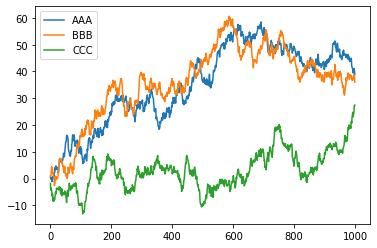

In [19]:
rand_x.plot(kind='line')

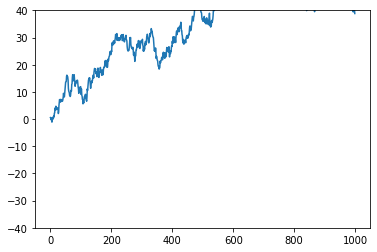

In [20]:
AAA = rand_x.AAA
AAA.plot(kind='line',ylim=(-40,40))

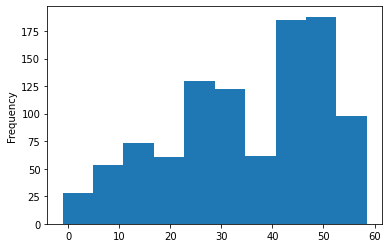

In [21]:
AAA.plot(kind='hist')

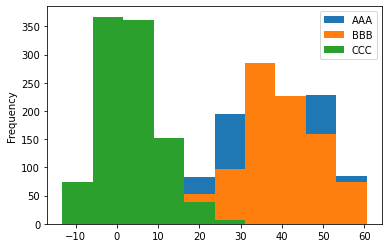

In [22]:
rand_x.plot(kind='hist')

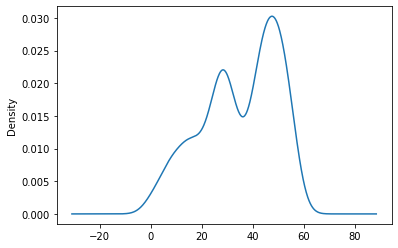

In [23]:
AAA.plot(kind='kde')

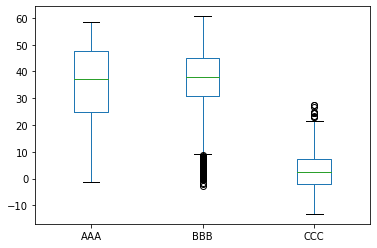

In [24]:
rand_x.plot(kind='box')

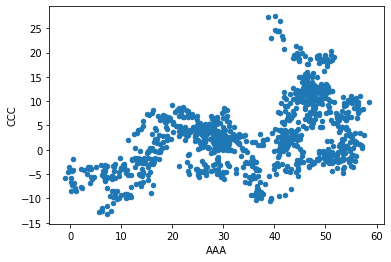

In [25]:
rand_x.plot(kind='scatter',x='AAA',y='CCC')

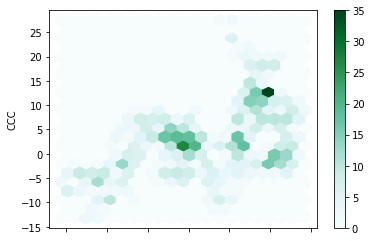

In [26]:
rand_x.plot(kind='hexbin',x='AAA',y='CCC',gridsize=20)

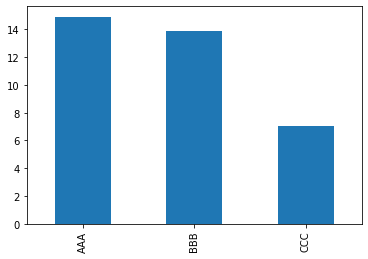

In [27]:
rand_x.std().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f06860610>,
      dtype=object)

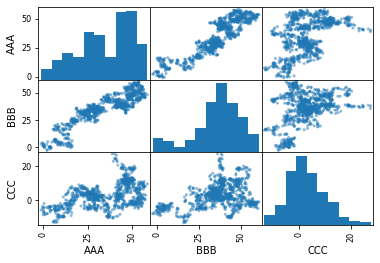

In [29]:
pd.plotting.scatter_matrix(rand_x)

***Author : Kaliappan Yadav***

In [30]:
import pandas as pd

In [31]:
data = pd.read_csv("/content/sample_data/california_housing_train.csv")
print(data)

       longitude  latitude  ...  median_income  median_house_value
0        -114.31     34.19  ...         1.4936             66900.0
1        -114.47     34.40  ...         1.8200             80100.0
2        -114.56     33.69  ...         1.6509             85700.0
3        -114.57     33.64  ...         3.1917             73400.0
4        -114.57     33.57  ...         1.9250             65500.0
...          ...       ...  ...            ...                 ...
16995    -124.26     40.58  ...         2.3571            111400.0
16996    -124.27     40.69  ...         2.5179             79000.0
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0
16999    -124.35     40.54  ...         3.0147             94600.0

[17000 rows x 9 columns]


In [32]:
print("count : \n",data.count())
print("sum : \n",data.sum())
print("min : \n",data.min())
print("max : \n",data.max())
print("mean : \n",data.mean())
print("median : \n",data.median())


count : 
 longitude             17000
latitude              17000
housing_median_age    17000
total_rooms           17000
total_bedrooms        17000
population            17000
households            17000
median_income         17000
median_house_value    17000
dtype: int64
sum : 
 longitude            -2.032556e+06
latitude              6.056288e+05
housing_median_age    4.860190e+05
total_rooms           4.494230e+07
total_bedrooms        9.169984e+06
population            2.430276e+07
households            8.520773e+06
median_income         6.602083e+04
median_house_value    3.524116e+09
dtype: float64
min : 
 longitude              -124.3500
latitude                 32.5400
housing_median_age        1.0000
total_rooms               2.0000
total_bedrooms            1.0000
population                3.0000
households                1.0000
median_income             0.4999
median_house_value    14999.0000
dtype: float64
max : 
 longitude               -114.3100
latitude                 

In [33]:
data.groupby("housing_median_age").mean().population

housing_median_age
1.0      637.000000
2.0     2005.224490
3.0     2934.673913
4.0     2739.956522
5.0     2456.979899
6.0     2111.263566
7.0     2705.483444
8.0     2055.483146
9.0     1866.093023
10.0    1721.305310
11.0    2044.067308
12.0    2145.515625
13.0    1807.510040
14.0    1884.657061
15.0    1634.283654
16.0    1517.634646
17.0    1601.041667
18.0    1606.784519
19.0    1611.822816
20.0    1521.451697
21.0    1642.941019
22.0    1764.043344
23.0    1575.429319
24.0    1616.424165
25.0    1560.331887
26.0    1455.495030
27.0    1394.516373
28.0    1449.887500
29.0    1449.810160
30.0    1426.296875
31.0    1396.539062
32.0    1387.150655
33.0    1289.760234
34.0    1230.865961
35.0    1197.741329
36.0    1088.579021
37.0    1088.128146
38.0    1112.138365
39.0    1143.986755
40.0    1113.160643
41.0    1051.616379
42.0    1132.753247
43.0    1038.062937
44.0    1024.442568
45.0    1007.548936
46.0    1049.244898
47.0    1032.531429
48.0     963.288889
49.0    1002.558559
5

In [34]:
data.groupby("housing_median_age").aggregate(['min','max'])

longitude          ... median_house_value          
                         min     max  ...                min       max
housing_median_age                    ...                             
1.0                  -122.00 -120.93  ...           189200.0  191300.0
2.0                  -122.51 -115.80  ...            47500.0  500001.0
3.0                  -122.33 -115.60  ...            83200.0  500001.0
4.0                  -122.72 -116.76  ...            42500.0  500001.0
5.0                  -122.55 -115.55  ...            50000.0  500001.0
6.0                  -122.76 -115.52  ...            58000.0  500001.0
7.0                  -122.79 -116.31  ...            56200.0  500001.0
8.0                  -123.00 -115.59  ...            22500.0  500001.0
9.0                  -123.49 -116.22  ...            54200.0  500001.0
10.0                 -123.40 -115.52  ...            53300.0  500001.0
11.0                 -124.23 -115.51  ...            50400.0  500001.0
12.0                 -124.09 -115.53  ...            40000.0  500001.0
13.0                 -124.17 -115.50  ...            43000.0  500001.0
14.0                 -124.05 -114.57  ...            32900.0  500001.0
15.0                 -124.19 -114.31  ...            32500.0  500001.0
16.0                 -124.00 -114.60  ...            14999.0  500001.0
17.0                 -124.30 -114.56  ...            27500.0  500001.0
18.0                 -124.10 -115.22  ...            47500.0  500001.0
19.0                 -124.30 -114.47  ...            14999.0  500001.0
20.0                 -124.21 -114.57  ...            32500.0  500001.0
21.0                 -124.19 -114.60  ...            25000.0  500001.0
22.0                 -124.14 -115.55  ...            34400.0  500001.0
23.0                 -124.16 -115.37  ...            30000.0  500001.0
24.0                 -124.15 -114.73  ...            32500.0  500001.0
25.0                 -124.14 -114.58  ...            45500.0  500001.0
26.0                 -124.17 -116.00  ...            36600.0  500001.0
27.0                 -124.14 -115.54  ...            40000.0  500001.0
28.0                 -124.22 -114.65  ...            40900.0  500001.0
29.0                 -124.14 -114.58  ...            28300.0  500001.0
30.0                 -124.19 -115.37  ...            42500.0  500001.0
31.0                 -124.13 -114.61  ...            34200.0  500001.0
32.0                 -124.25 -115.37  ...            43100.0  500001.0
33.0                 -124.18 -115.46  ...            22500.0  500001.0
34.0                 -124.18 -114.59  ...            26600.0  500001.0
35.0                 -124.18 -115.38  ...            39600.0  500001.0
36.0                 -124.27 -116.56  ...            14999.0  500001.0
37.0                 -124.19 -115.60  ...            42100.0  500001.0
38.0                 -124.14 -115.38  ...            39400.0  500001.0
39.0                 -124.18 -117.07  ...            17500.0  500001.0
40.0                 -122.82 -116.98  ...            43000.0  500001.0
41.0                 -123.98 -114.59  ...            41800.0  500001.0
42.0                 -124.10 -117.07  ...            39400.0  500001.0
43.0                 -124.17 -117.01  ...            46600.0  500001.0
44.0                 -124.09 -115.73  ...            48300.0  500001.0
45.0                 -123.22 -117.12  ...            30000.0  500001.0
46.0                 -124.16 -114.60  ...            26900.0  500001.0
47.0                 -124.15 -117.10  ...            49600.0  500001.0
48.0                 -122.97 -114.61  ...            48600.0  500001.0
49.0                 -123.79 -117.10  ...            52000.0  500001.0
50.0                 -124.16 -117.11  ...            54200.0  500001.0
51.0                 -122.48 -117.15  ...            51900.0  500001.0
52.0                 -124.35 -116.88  ...            14999.0  500001.0

[52 rows x 16 columns]

Merging & Reshaping 

In [214]:
roll_no = [i for i in range(1,61)]
Physics = pd.DataFrame({"roll_no":roll_no,"Physics":[1 for i in range(60)]}).set_index("roll_no")
Chemistry = pd.DataFrame({"roll_no":[i for i in range(1,61) if i%3==0 ]}).set_index("roll_no")
Chemistry["Chemistry"] =1

In [216]:
Physics

,Physics
roll_no,
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [217]:
Chemistry

,Chemistry
roll_no,
3,1
6,1
9,1
12,1
15,1
18,1
21,1
24,1
27,1


Students who passed both chemistry & physics

In [224]:
Physics.join(Chemistry,how="inner",on="roll_no")

,Physics,Chemistry
roll_no,,
3,1,1
6,1,1
9,1,1
12,1,1
15,1,1
18,1,1
21,1,1
24,1,1
27,1,1
